<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 11 - Class 2 - 11/24</h1>
</div>

## Objectives for this week:

* RESTful APIs
* GraphQL APIs
* Integrating models in views
* Connecting our database to our API

Today's objective:
* GraphQL APIs
* Integrating models in views
* Connecting our database to our API

# Exercise

Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.

Examples:

```
Input: nums = [2,2,1]
Output: 1

Input: nums = [4,1,2,1,2]
Output: 4

Input: nums = [1]
Output: 1
```

In [ ]:
def single_number(nums):
    pass

In [ ]:
try:
    assert(single_number([2,2,1]) == 1)
    assert(single_number([4,1,2,1,2]) == 4)
    assert(single_number([1]) == 1)
    print("solution is correct")
except:
    print("solution is incorrect")

# Exercise

Given a non-negative integer num, repeatedly add all its digits until the result has only one digit.  
Example:
```
Input: 38
Output: 2 
Explanation: 
The process is like: 3 + 8 = 11, 1 + 1 = 2. 
Since 2 has only one digit, return it.
```

In [ ]:
def add_digits(num):
    pass

In [ ]:
try:
    assert(add_digits(38) == 2)
    print("solutions is correct")
except:
    print("solution is incorrect")

# Algorithms and Data Structures:

### An example of a Linked List

A linked list is a linear collection of data elements whose order is not given by their physical placement in memory. Instead, each element points to the next. It is a data structure consisting of nodes which together represent a sequence. In it's most basic form, each node contains: data and a reference (in other words, a link).



In [ ]:
%load_ext tutormagic

In [ ]:
#%%tutor --lang python3 -k

class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        
class LinkedList:
    def __init__(self):
        self.tail = None
        self.head = None
        self.count = 0
        
    def iterate_items(self):
        current_item = self.head
        while current_item:
            val = current_item.data
            current_item = current_item.next
            yield val
            
    def append(self, data=None):
        node = Node(data)
        if self.tail:
            self.tail.next = node
            self.tail = node
        else:
            self.tail = node
            self.head = node
        self.count += 1
        
items = LinkedList()
items.append('HTML')
items.append('CSS')
items.append('Javascript')
items.append('Python')
items.count
for val in items.iterate_items():
    print(val)    

In [ ]:
class Comment:
    def __init__(self, comment=None):
        self.comment = comment
        self.reply = None
        self.subthread = None
    
    def __repr__(self):
        return f"<Comment: '{self.comment}' subthread:{self.subthread.count if self.subthread else 0}>"
    
class CommentThread:
    def __init__(self):
        self.latest = None
        self.first = None
        self.count = 0
        
    def timeline(self):
        current_comment = self.first
        while current_comment:
            comment = current_comment
            current_comment = current_comment.reply
            yield comment
            
    def add_reply(self, comment_text=None):
        comment = Comment(comment_text)
        if self.latest:
            self.latest.reply = comment
            self.latest = comment
        else:
            self.latest = comment
            self.first = comment
        self.count += 1
        
comment_thread = CommentThread()
comment_thread.add_reply("first comment")
comment_thread.add_reply("second comment")
comment_thread.add_reply("third comment")
comment_thread.add_reply("fourth comment")
comment_thread.add_reply("fifth comment")

# subcomment_thread = CommentThread()
# subcomment_thread.add_reply("first subcomment")
# subcomment_thread.add_reply("second subcomment")
# subcomment_thread.add_reply("third subcomment")
# subcomment_thread.add_reply("fourth subcomment")
# subcomment_thread.add_reply("fifth subcomment")

# comment_thread.first.subthread = subcomment_thread

print(comment_thread.count)
for c in comment_thread.timeline():
    print(c)
    if (sct := c.subthread):
        for sc in sct.timeline():
            print(sc)
        

# Stacks

Stacks are a data structure in computer science that serves as a collection of elements with two main principle operations:
* push - which adds an element to the collection
* pop - which removes the most recently added element to the collection (essentially LIFO)

There is a 3rd operation commonly found in stacks called `peek` which allows you to see the top of the stack without popping the element.

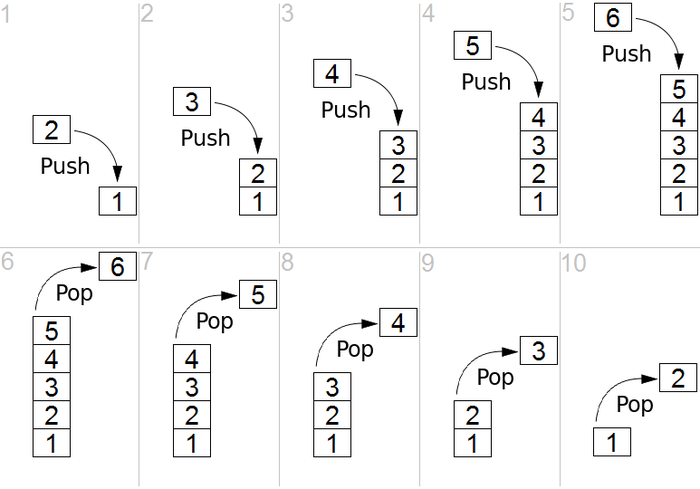

In [ ]:
class Element:
    def __init__(self, val=None):
        self.val = val
        self.next = None
    
    def __repr__(self):
        return f"<Element- val:{self.val}>"
        
class Stack:
    def __init__(self):
        self.bottom = None
        self.top = None
        self.count = 0
    
    def iterate_stack(self):
        current_element = self.top
        while current_element:
            val = current_element.val
            current_element = current_element.next
            yield val
            
    def push(self, val=None):
        element = Element(val)
        if self.top:
            element.next = self.top
            self.top = element
        else:
            self.bottom = element
            self.top = element
        self.count += 1
            
    def pop(self):
        if self.count > 1:
            popped_element = self.top
            self.top = popped_element.next
            self.count -= 1
            return popped_element
        elif self.count == 1:
            element = self.top
            self.top, self.bottom = None, None
            count -= 1
            return element
        else:
            return None
    
    def peek(self):
        return self.top
    
stack = Stack()
stack.push("1")
stack.push("2")
stack.push("3")
stack.push("4")
stack.push("5")
print("count:", stack.count)
print("popped:", stack.pop())
print("count:", stack.count)
print("peek", stack.peek())
print("remaining stack:", list(stack.iterate_stack()))

# Creating a REST API

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

d = {}

@app.route('/', methods=['GET'])
def get_records():
    return jsonify(d)

@app.route('/', methods=['POST'])
def create_record():
    for k,v in request.args.items():
        if not k in d.keys():
            d[k] = v
    return jsonify({"added": request.args, "current": d})

@app.route('/', methods=['DELETE'])
def delete_record():
    deleted = {}
    for k,v in request.args.items():
        try:
            d.pop(k)
            deleted[k] = v
        except:
            continue
    return jsonify({"deleted": deleted, "current": d})
                
if __name__ == '__main__':
    app.run(debug=True)

# Using a REST API

In [ ]:
# GET request
import requests
import json
r = requests.get("http://127.0.0.1:5000/")
json_resp = json.loads(r.text)
json_resp

In [ ]:
# POST request

import requests
import json
data = {"hello": "world", "new": "entry", "json":"data"}
headers = {"Content-Type": "application/json"}
r = requests.post("http://127.0.0.1:5000/", params=data, headers=headers)
json_resp = json.loads(r.text)
json_resp

In [ ]:
# DELETE request
import requests
import json
data = {"new": "entry"}
headers = {"Content-Type": "application/json"}
r = requests.delete("http://127.0.0.1:5000/", params=data, headers=headers)
json_resp = json.loads(r.text)
json_resp

# GraphQL APIs

GraphQL is a newer standard similar to REST. It also primarily passes JSON data between client and browser. However, did you notice that our requests/responses are more static than maybe we'd like. 

Say we had a REST API endpoint that responded with data of this sort:

```json
{ 
"accounting" : [   
    { "firstName" : "John",  
      "lastName"  : "Doe",
      "age"       : 23 },

    { "firstName" : "Mary",  
      "lastName"  : "Smith",
      "age"      : 32 }
    ...
],                            
"sales"      : [ 
    { "firstName" : "Sally", 
      "lastName"  : "Green",
      "age"      : 27 },

    { "firstName" : "Jim",   
      "lastName"  : "Galley",
      "age"       : 41 }
    ...
] 
} 

```

It might respond with every employee in the company. What if we wanted to build an API that was dynamic. So we could call an endpoint with parameters to only get back the data that we'd like. GraphQL would allow us to query only the employees of "sales".

This dynamic nature of GraphQL is why it's growing in popularity.

REST
* multiple endpoints
* data structure is controlled by the backend
* provides stateless servers and structured access to resources
* frontend has no control over how and what the data looks like
* structured against the view it serves. This means that the backend is required to create new APIs or adjust existing ones to serve the correct amount and type of data. This can lead to longer time to production and slow down the development process.

GraphQL
* single endpoints that take in dynamic parameters
* allows for more dynamic development once implemented
* provides stateless servers and flexible controlled access to resources. While in REST, it’s complete control and the data is given based on what the backend has coded, GraphQL puts controls on what can be accessed but leaves the structure of data to the frontend.
* only sends a single request in the body and includes a query that contains all the data requirements. This brings data into the frontend and reduces the amount of workload required on the backend to adjust to the changing needs of data requirements.
* the root field will return a data field with all the data you want and in the format you need it
* allows for rapid iteration and faster feedback for the business


# Code Along

Setting up our project.

In [ ]:
from flask import Flask, render_template, request, redirect, url_for
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///ds_course_database.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)


class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(255), nullable=False)
    password = db.Column(db.String(255), nullable=False)
    
    def __repr__(self):
        return f"<User {self.id} {self.username}>" 
    
@app.route('/')
def home():
    usrs = User.query.all()
    return render_template("home.html", users=usrs)

@app.route('/register', methods=["GET", "POST"])
def register():
    if request.method == 'POST':
        un = request.form["username"]
        pw = request.form["password"]
        user = User(username=un, password=pw)
        db.session.add(user)
        db.session.commit()
        return redirect(url_for('home'))
    return render_template("register.html")

if __name__ == '__main__':
    db.drop_all()
    db.create_all()
    app.run(debug=True)

#db.session.add(new_student)
#db.session.commit()

# Lab

Work on lab from yesterday, the project due tomorrow and any other assignment you need to (re)submit.